In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, Input

import matplotlib.pyplot as plt

**Load Data**

In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(f'X train: {X_train.shape}\ny train: {y_train.shape}\n\nX valid: {X_valid.shape}\ny valid: {y_valid.shape}')

X train: (60000, 28, 28)
y train: (60000,)

X valid: (10000, 28, 28)
y valid: (10000,)


In [5]:
SAMPLE_SIZE = 12

In [6]:
y_train[0:SAMPLE_SIZE]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

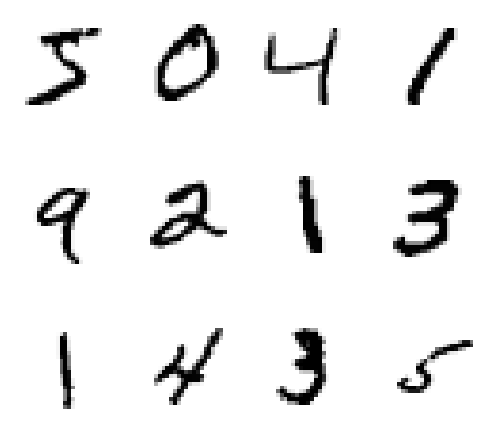

In [7]:
plt.figure(figsize=(5, 5))

for i in range(SAMPLE_SIZE):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

**Preprocess Data**

In [8]:
def reshape_image_data(data, rows):
    return data.reshape(rows, 28, 28, 1).astype('float32') / 255

In [9]:
X_train = reshape_image_data(X_train, X_train.shape[0])
X_valid = reshape_image_data(X_valid, X_valid.shape[0])

In [10]:
CLASSES_AMOUNT = 10

# one-hot encoding
y_train = to_categorical(y_train, CLASSES_AMOUNT)
y_valid = to_categorical(y_valid, CLASSES_AMOUNT)

**Design Neural Network Architecture**

In [11]:
model = Sequential()

KERNEL_SIZE = (3, 3)
ACTIVATION ='relu'
OUTPUT_ACTIVATION = 'softmax'
POOL_SIZE = (2, 2)
DROPOUT_RATE=0.25
DENSE = 128

def conv2D_layer(filters, kernel_size=KERNEL_SIZE, activation=ACTIVATION):
    return Conv2D(filters=filters, kernel_size=kernel_size, activation=activation)

model.add(Input((28, 28, 1)))

# 1st hiddden layer
model.add(conv2D_layer(32))

# 2nd hidden layer
model.add(conv2D_layer(64))
model.add(MaxPooling2D(pool_size=POOL_SIZE))
model.add(Dropout(DROPOUT_RATE))
model.add(Flatten())

# 3rd hidden layer
model.add(Dense(DENSE, activation=ACTIVATION))
model.add(Dropout(DROPOUT_RATE*2))

# output layer
model.add(Dense(CLASSES_AMOUNT, OUTPUT_ACTIVATION))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

**Configure Model**

In [13]:
model.compile(
    optimizer='nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Train**

In [14]:
BATCH_SIZE=128
EPOCHS=10

trained = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10


I0000 00:00:1731355024.789020     102 service.cc:145] XLA service 0x7a3ca000b8e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731355024.789064     102 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731355024.789068     102 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 21/469 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4199 - loss: 1.7450

I0000 00:00:1731355030.480412     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8455 - loss: 0.4955 - val_accuracy: 0.9830 - val_loss: 0.0545
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9716 - loss: 0.0973 - val_accuracy: 0.9854 - val_loss: 0.0416
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9794 - loss: 0.0673 - val_accuracy: 0.9875 - val_loss: 0.0365
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9827 - loss: 0.0584 - val_accuracy: 0.9893 - val_loss: 0.0319
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9845 - loss: 0.0481 - val_accuracy: 0.9902 - val_loss: 0.0301
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9904 - val_loss: 0.0314
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9882 - loss: 0.0372 - val_accuracy: 0.9908 - val_loss: 0.0284
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9898 - loss: 0.0330 - val_accuracy: 0.9901 - va

In [15]:
import sys 
sys.path.append(os.path.abspath('/kaggle/usr/lib/utils/utils.py'))

import utils

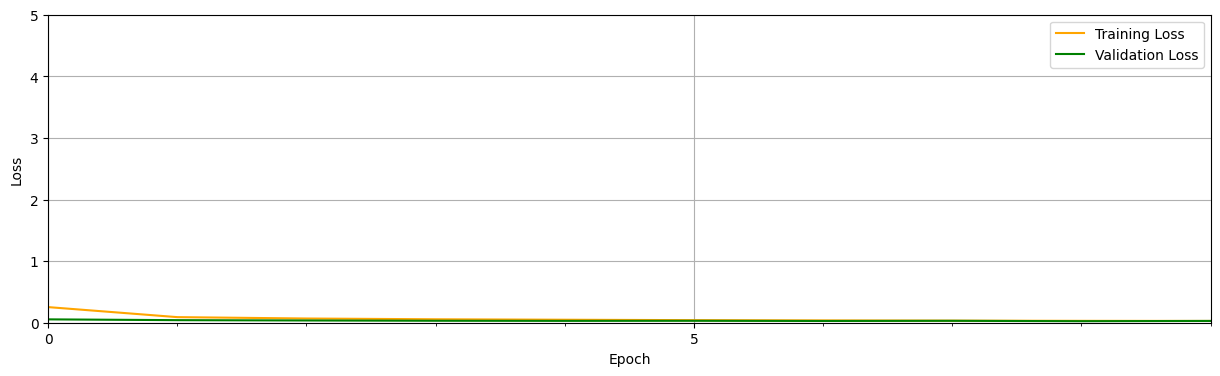

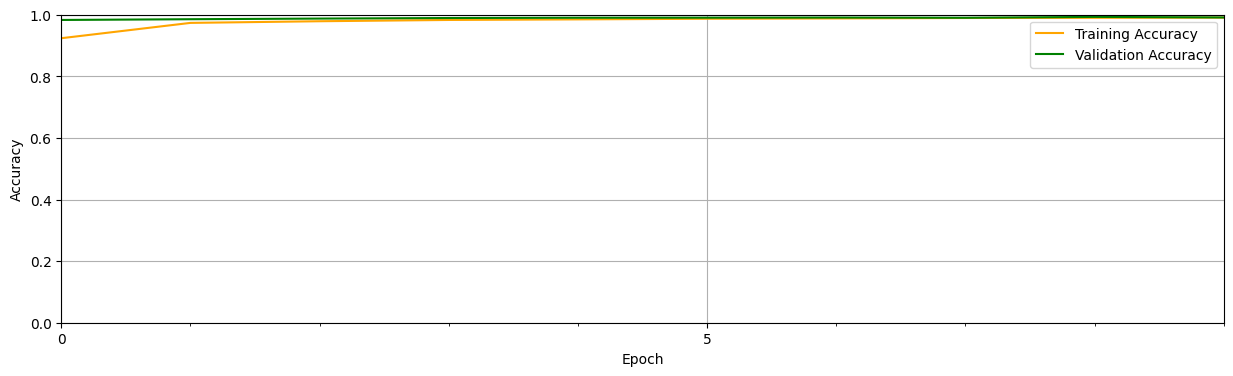

In [16]:
utils.plot_loss_and_accuracy(trained, EPOCHS)